In [7]:
import pandas as pd
import os
import re
import string
import nltk

#nltk.download()

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Check current working directory.
retval = os.getcwd()
print("Current working directory %s" % retval)


## Read the csv file with all listings
parsed10K = pd.read_csv('./ParsedText/parsedText10K.csv', encoding="ISO-8859-1")

parsed10K

# file = open('MEDALLION_FINANCIAL_CORP.txt','r')
# data = file.readlines()
# lines = [lines for lines in data]
# print(lines)




Current working directory C:\Users\mailt\Documents\Capstone


,CompanyName,TypeOfFiling,Item1,Item1A,Item7,Item7A,Item8,Item9,AccessedURL
0,MEDALLION FINANCIAL CORP,10-K,"ITEM 1. OUR BUSINESS We, Medallion Financial C...",ITEM 1A. RISK FACTORS Risks Relating to Our Bu...,ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,ITEM 7A. QUANTITATIVE AND QUALITATIVE DISCLOSU...,ITEM 8. FINANCIAL STATEMENTS AND SUPPLEMENTARY...,ITEM 9A. CONTROLS AND PROCEDURES Disclosure Co...,https://www.sec.gov/Archives/edgar/data/100020...
1,HENRY SCHEIN INC,10-K,ITEM 1. Business General We believe we are th...,ITEM 1A. Risk Factors The risks described belo...,ITEM 7. Management's Discussion and Analysis...,ITEM 7A. Quantitative and Qualitative Disclos...,ITEM 8. Financial Statements and Supplementary...,ITEM 9A. Controls and Procedures Evaluation o...,https://www.sec.gov/Archives/edgar/data/100022...
2,CORE LABORATORIES N V,10-K,ITEM 1. BUSINESS General Core Laboratories N.V...,ITEM 1A. RISK FACTORS Our forward-looking stat...,ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,ITEM 7A. QUANTITATIVE AND QUALITATIVE DISCLOSU...,ITEM 8. FINANCIAL STATEMENTS AND SUPPLEMENTARY...,ITEM 9A. CONTROLS AND PROCEDURES Disclosure Co...,https://www.sec.gov/Archives/edgar/data/100022...
3,KENTUCKY BANCSHARES INC /KY/,10-K,"Item 1. Business General Kentucky Bancshares,...","Item 1A. Risk Factors There are factors, many...",Item 7. Management's Discussion and Analysis ...,Item 7A. Quantitative and Qualitative Disclos...,Item 8. Financial Statements The management o...,Item 9A. Controls and Procedures EVALUATION O...,https://www.sec.gov/Archives/edgar/data/100023...
4,IMPAC MORTGAGE HOLDINGS INC,10-K,"ITEM 1. BUSINESS Impac Mortgage Holdings, Inc....",ITEM 1A. RISK FACTORS Some of the following ri...,ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,ITEM 7A. QUANTITATIVE AND QUALITATIVE DISCLOSU...,ITEM 8. FINANCIAL STATEMENTS AND SUPPLEMENTARY...,ITEM 9A. CONTROLS AND PROCEDURES Evaluation of...,https://www.sec.gov/Archives/edgar/data/100029...
5,SCHWEITZER MAUDUIT INTERNATIONAL INC,10-K,Item 1. Business Disclosure Regarding Forward-...,Item 1A. Risk Factors Factors That May Affect ...,Item 7. Management's Discussion and Analysis...,Item 7A. Quantitative and Qualitative Disclosu...,Item 8. Financial Statements and Supplementar...,Item 9A. Controls and Procedures Evaluation of...,https://www.sec.gov/Archives/edgar/data/100062...


In [15]:
# from nltk.corpus import brown
# brown.words()

parsed10K['Item1'][4]

'ITEM 1. BUSINESS Impac Mortgage Holdings, Inc., sometimes referred to herein as the "Company," "we," "our" or "us," is a Maryland corporation incorporated in August 1995 and includes the following subsidiaries: Integrated Real Estate Service Corporation, or IRES, IMH Assets Corp. and Impac Funding Corporation. IRES subsidiary, Impac Mortgage Corp. (IMC), formerly known as Excel Mortgage Servicing, Inc., or Excel, conducts our mortgage lending and real estate services operations. Forward - Looking Statements This report on Form 10 - K contains certain forward - looking statements within the meaning of Section 27A of the Securities Act of 1933 and Section 21E of the Securities Exchange Act of 1934. Forward - looking statements, some of which are based on various assumptions and events that are beyond our control, may be identified by reference to a future period or periods or by the use of forward - looking terminology, such as "may," "will," "believe," "expect," "likely," "should," "co

# Tokenize and stemming

In [16]:
def nltk_noise_removal(text):
    tokens = word_tokenize(text) #split into words
    tokens = [w.upper() for w in tokens]
    
    #remove punctuations
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    #remove non-alphabetic words
    words = [word for word in stripped if word.isalpha()]
    
    #filter out stop words  ---- english
    stop_words = stopwords.words('english') ## stop words from english
    stop_words = [words.upper() for words in stop_words]
    
    #filter stop words mcdonald
    mcdonald_file = open('StopWords_Generic.txt','r')
    mcdonald_stopwords = mcdonald_file.readlines()
    sw = [words for words in mcdonald_stopwords]
    a = [s.rstrip() for s in sw] ### stopwords from mcdonald
    
    stopwords_all = stop_words + a
    words = [w for w in words if not w in stopwords_all]
    #print(words)
    return words

# for lines in data:
#     corpus = nltk_noise_removal(lines)

corpus = nltk_noise_removal(parsed10K['Item1'][4])
print(corpus)
    
    ### Optional -- in the resources they have asked to skip this in order to keep the original words
#     porter = PorterStemmer()
#     stemmed = [porter.stem(word) for word in tokens]
#     print(stemmed[:100])



['ITEM', 'BUSINESS', 'IMPAC', 'MORTGAGE', 'HOLDINGS', 'INC', 'SOMETIMES', 'REFERRED', 'HEREIN', 'COMPANY', 'US', 'MARYLAND', 'CORPORATION', 'INCORPORATED', 'AUGUST', 'INCLUDES', 'FOLLOWING', 'SUBSIDIARIES', 'INTEGRATED', 'REAL', 'ESTATE', 'SERVICE', 'CORPORATION', 'IRES', 'IMH', 'ASSETS', 'CORP', 'IMPAC', 'FUNDING', 'CORPORATION', 'IRES', 'SUBSIDIARY', 'IMPAC', 'MORTGAGE', 'CORP', 'IMC', 'FORMERLY', 'KNOWN', 'EXCEL', 'MORTGAGE', 'SERVICING', 'INC', 'EXCEL', 'CONDUCTS', 'MORTGAGE', 'LENDING', 'REAL', 'ESTATE', 'SERVICES', 'OPERATIONS', 'FORWARD', 'LOOKING', 'STATEMENTS', 'REPORT', 'FORM', 'K', 'CONTAINS', 'CERTAIN', 'FORWARD', 'LOOKING', 'STATEMENTS', 'WITHIN', 'MEANING', 'SECTION', 'SECURITIES', 'ACT', 'SECTION', 'SECURITIES', 'EXCHANGE', 'ACT', 'FORWARD', 'LOOKING', 'STATEMENTS', 'BASED', 'VARIOUS', 'ASSUMPTIONS', 'EVENTS', 'BEYOND', 'CONTROL', 'MAY', 'IDENTIFIED', 'REFERENCE', 'FUTURE', 'PERIOD', 'PERIODS', 'USE', 'FORWARD', 'LOOKING', 'TERMINOLOGY', 'MAY', 'BELIEVE', 'EXPECT', 'LIKE

# Word Cloud


In [12]:
##from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [20]:
corpus1 = nltk_noise_removal(parsed10K['Item1'][3])
corpus2 = nltk_noise_removal(parsed10K['Item1'][2])
corpus3 = nltk_noise_removal(parsed10K['Item1'][1])


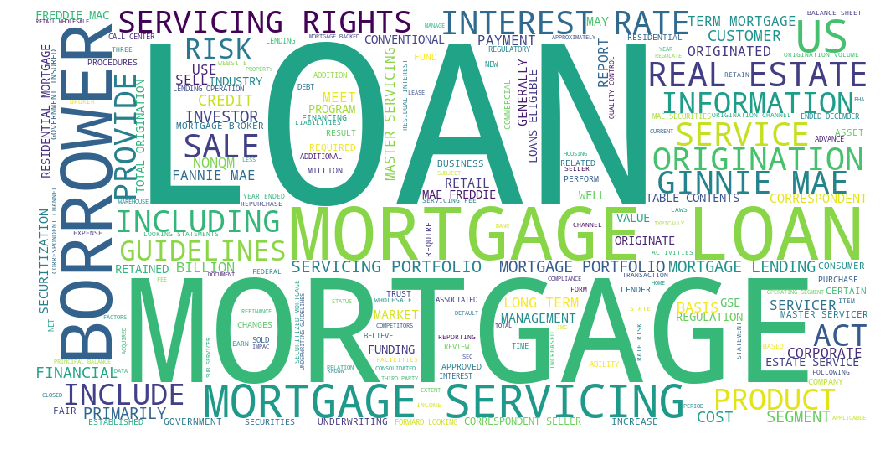

In [17]:
#convert list to string and generate
unique_string=(" ").join(corpus)
wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

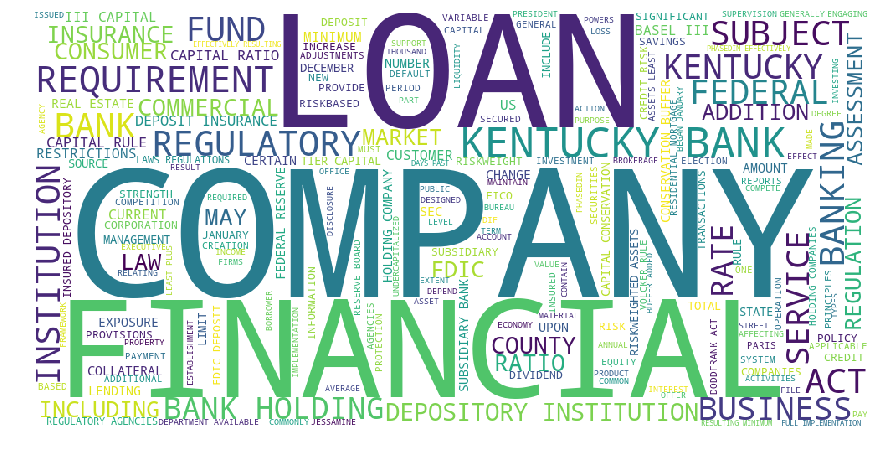

In [19]:
#convert list to string and generate
unique_string=(" ").join(corpus1)
wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

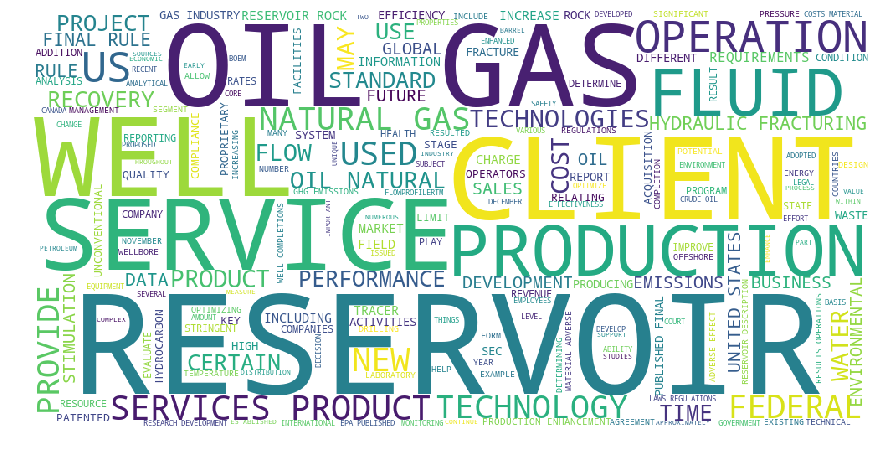

In [22]:
#convert list to string and generate
unique_string=(" ").join(corpus2)
wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

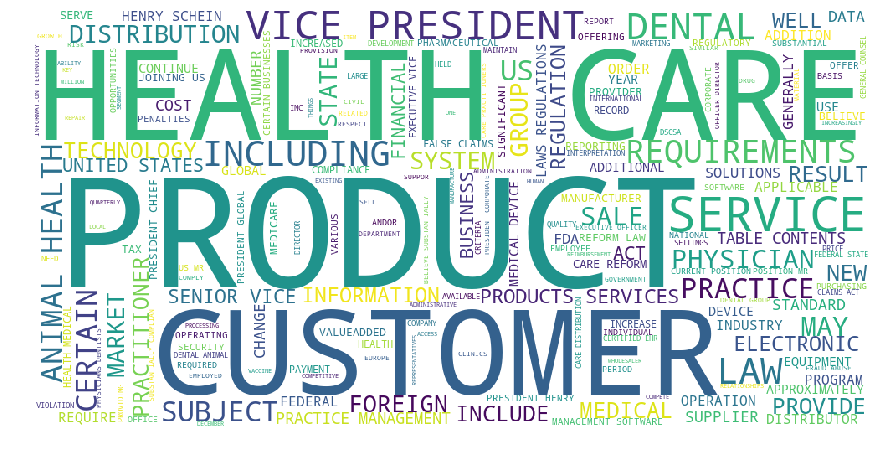

In [23]:
#convert list to string and generate
unique_string=(" ").join(corpus3)
wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()